In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
compensation=pd.read_csv('global\dataglobal\clean_employee_compensation.csv',parse_dates=True)
compensation=compensation.drop('Unnamed: 0',axis=1)

In [3]:
employment=pd.read_csv('global\dataglobal\clean_employment.csv',parse_dates=True)
employment=employment.drop('Unnamed: 0',axis=1)

In [4]:
compensation.columns

Index(['STRUCTURE_NAME', 'Zone de référence', 'Secteur institutionnel',
       'Transaction', 'Activité économique', 'TIME_PERIOD', 'OBS_VALUE',
       'Multiplicateur d'unité'],
      dtype='object')

In [5]:
compensation['Activité économique'].unique()

array(['Construction',
       'Public administration, defence, education, human health and social work activities',
       'Professional, scientific and technical activities; administrative and support service activities',
       'Activités de fabrication', 'Total - Toutes les activités',
       'Information et communication', 'Activités immobilières',
       'Industrie (sauf construction)',
       'Activités financières et d’assurances',
       'Agriculture, sylviculture et pêche',
       'Wholesale and retail trade; repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities',
       'Arts, entertainment and recreation; other service activities; activities of household and extra-territorial organizations and bodies'],
      dtype=object)

In [6]:
a=compensation[compensation['Zone de référence'].isin(['France','Allemagne','Italie','Espagne','Roumanie','Bulgarie','Suède','Norvège'])]
a=a[a['Activité économique']=='Professional, scientific and technical activities; administrative and support service activities']
a=a[a['Transaction']=='Rémunération des salariés']
a['TIME_PERIOD']=pd.to_datetime(a['TIME_PERIOD'])
a=a[a['TIME_PERIOD']>pd.Timestamp(year=2000,month=1,day=1)]

In [7]:
px.line(a,x='TIME_PERIOD',y='OBS_VALUE',color='Zone de référence')

In [8]:
employment['Activité économique'].unique()

array(['Activités immobilières', 'Industrie (sauf construction)',
       'Activités de fabrication', 'Agriculture, sylviculture et pêche',
       'Wholesale and retail trade; repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities',
       'Arts, entertainment and recreation; other service activities; activities of household and extra-territorial organizations and bodies',
       'Public administration, defence, education, human health and social work activities',
       'Construction',
       'Professional, scientific and technical activities; administrative and support service activities',
       'Information et communication', 'Total - Toutes les activités',
       'Activités financières et d’assurances'], dtype=object)

In [9]:
b=compensation[compensation['Zone de référence'].isin(['France','Allemagne','Italie','Espagne','Roumanie','Bulgarie','Suède','Norvège'])]
b=b[b['Activité économique']=='Industrie (sauf construction)']
b=b[b['Transaction']=='Rémunération des salariés']
b['TIME_PERIOD']=pd.to_datetime(b['TIME_PERIOD'])
b=b[b['TIME_PERIOD']>pd.Timestamp(year=2000,month=1,day=1)]

In [10]:
px.line(b,x='TIME_PERIOD',y='OBS_VALUE',color='Zone de référence')

In [11]:
stringency=pd.read_csv('global\dataglobal\clean_stringency.csv',parse_dates=True)
cases=pd.read_csv('global\weekly_cases_per_million.csv',parse_dates=True)
cases['date']=pd.to_datetime(cases['date'])
stringency['date']=pd.to_datetime(stringency['date'])


In [12]:
casesfr=cases[['date','France']]

In [13]:
stringencyfr=stringency[stringency['location']=='France'][['date','stringency_index']]

KeyError: 'location'

In [ ]:
a=compensation[compensation['Zone de référence'].isin(['France'])]
a=a[a['Activité économique']=='Professional, scientific and technical activities; administrative and support service activities']
a=a[a['Transaction']=='Rémunération des salariés']
a['TIME_PERIOD']=pd.to_datetime(a['TIME_PERIOD'])
a=a[a['TIME_PERIOD']>pd.Timestamp(year=2000,month=1,day=1)]

In [ ]:
casesfr=casesfr.dropna()

In [ ]:
casesfr.loc[:,'France']=casesfr['France']*a['OBS_VALUE'].mean()/casesfr['France'].mean()

In [ ]:
stringencyfr.loc[:,'stringency_index']=stringencyfr['stringency_index']*a['OBS_VALUE'].mean()/stringencyfr['stringency_index'].mean()

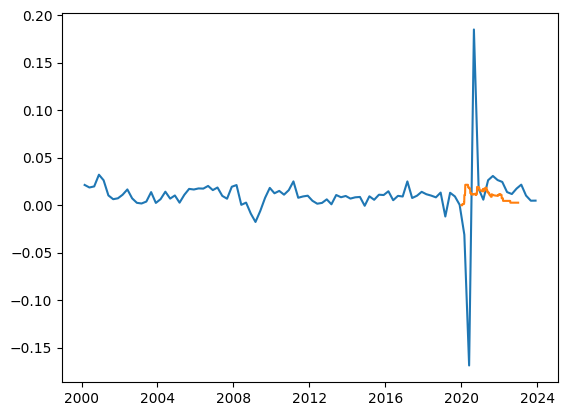

In [ ]:

plt.plot(a['TIME_PERIOD'],a['OBS_VALUE'])
plt.plot(stringencyfr['date'],stringencyfr['stringency_index'])

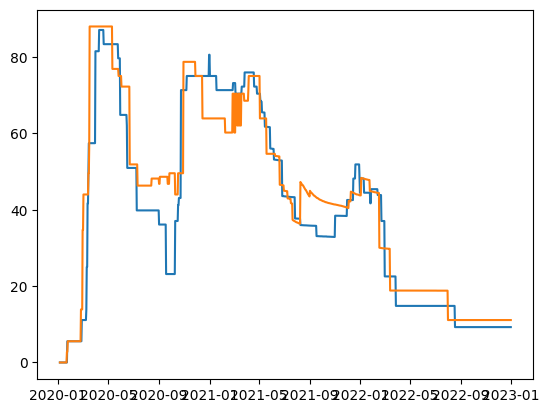

In [18]:
plt.plot(stringency[stringency['Countries']=='Poland'].date,stringency[stringency['Countries']=='Poland'].stringency_index)
plt.plot(stringency[stringency['Countries']=='France'].date,stringency[stringency['Countries']=='France'].stringency_index)


In [27]:
compfr=compensation[(compensation['Transaction']=='Salaires et traitements bruts') & (compensation['Zone de référence']=='France') & (compensation['Activité économique']=='Total - Toutes les activités')]

In [26]:
compensation['Transaction'].unique()

array(['Cotisations sociales à la charge des employeurs',
       'Rémunération des salariés', 'Salaires et traitements bruts'],
      dtype=object)

In [31]:
cons=pd.read_csv('global/finalconsumptionexpenditure.csv')

C:\Users\vadim\AppData\Local\Temp\ipykernel_7828\3138607945.py:1: DtypeWarning:

Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.



In [33]:
cons.STRUCTURE_NAME.unique()

array(['Dépenses trimestrielles de consommation finale des ménages pour les biens durables et autres biens et services'],
      dtype=object)